<a href="https://colab.research.google.com/github/basartimucin/MPA-MLF/blob/main/Week1_Lab_03_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
print("Iris Matrix:\n", iris.data[0:10,:])
print("\nIris Matrix size:\n",iris.data.shape)
print("\nIris Target:\n", iris.target)
print("\nIris Array length:\n",len(iris.target))
print("\nIris Features:\n",iris.feature_names)

Iris Matrix:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Iris Matrix size:
 (150, 4)

Iris Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Iris Array length:
 150

Iris Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
#Function for making test datasets randomly splits with given ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("Dimensions of data: ", X_train.shape)
print("Dimensions of test data: " , X_test.shape)

Dimensions of data:  (120, 4)
Dimensions of test data:  (30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
iris_subset = iris.data[:, :2]
sub_indices = iris.target != 2
X_subset = iris_subset[sub_indices]
y_subset = iris.target[sub_indices]

print("Dimensions of data subset: ", X_subset.shape)
print("Subset (ex. from 0 to 5) \n", X_subset[:5,:])
print("\nDimensions of target subset: ", y_subset.shape)
print("Subset (ex. last 5 elements): ", y_subset[-5:])

Dimensions of data subset:  (100, 2)
Subset (ex. from 0 to 5) 
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

Dimensions of target subset:  (100,)
Subset (ex. last 5 elements):  [1 1 1 1 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

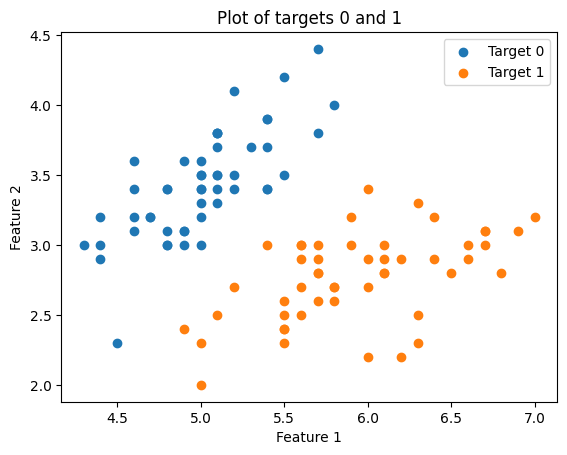

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X_subset[y_subset == 0][:, 0], X_subset[y_subset == 0][:, 1], label='Target 0')
plt.scatter(X_subset[y_subset == 1][:, 0], X_subset[y_subset == 1][:, 1], label='Target 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of targets 0 and 1')
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
X_subset_train, X_subset_test, y_subset_train, y_subset_test = train_test_split(X_subset,y_subset,test_size=0.2)
c_value = 200
SVMmodel=SVC(kernel='linear',C = c_value)
SVMmodel.fit(X_subset_train,y_subset_train)
SVMmodel.get_params()
SVMmodel.score(X_subset_test,y_subset_test)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

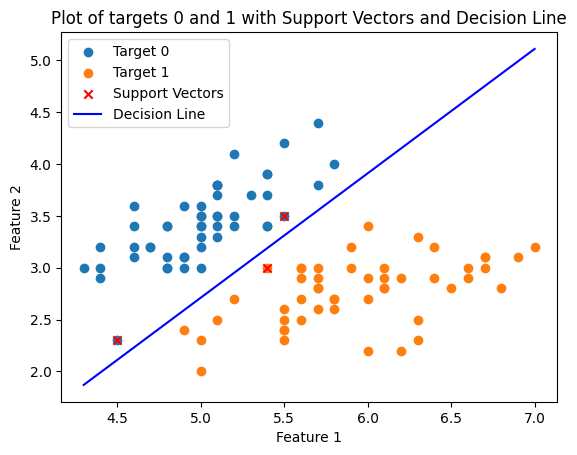

In [ ]:

plt.scatter(X_subset[y_subset == 0][:, 0], X_subset[y_subset == 0][:, 1], label='Target 0')
plt.scatter(X_subset[y_subset == 1][:, 0], X_subset[y_subset == 1][:, 1], label='Target 1')

plt.scatter(SVMmodel.support_vectors_[:, 0], SVMmodel.support_vectors_[:, 1], color='red', marker='x', label='Support Vectors')

# Plotting the decision line
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_
x0 = np.linspace(np.min(X_subset[:, 0]), np.max(X_subset[:, 0]), 100)
x1 = -(W[0] * x0 + b) / W[1]
plt.plot(x0, x1, color='blue', linestyle='-', label='Decision Line')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of targets 0 and 1 with Support Vectors and Decision Line')
plt.legend()
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

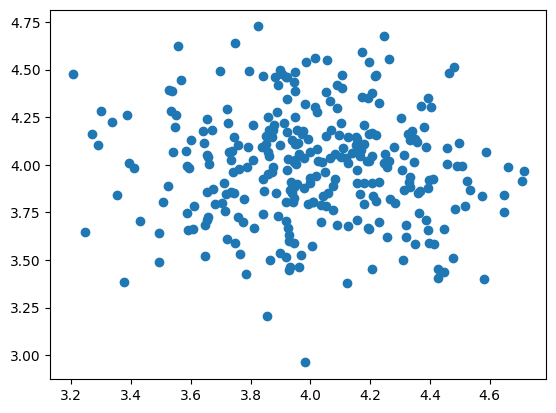

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

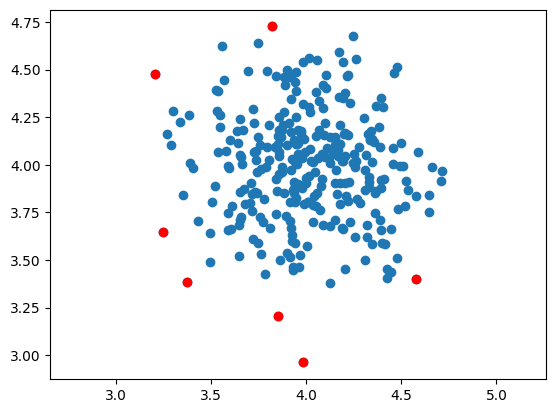

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

In [ ]:
plt.scatter(x[:,0],x[:,1])
#plt.scatter(values[:,0],values[:,-1],color+'red')
plt.axis('equal')
supvectors2=SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:,0],supvectors2[:,1])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-13-8a6480d1ded0>, line 5)

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)
print(scores)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored